In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset from file
data = pd.read_csv("D:/Big_data_analytics/sem_3/NLP/New folder/UpdatedResumeDataSet.csv/UpdatedResume.csv")
data.head()


,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [9]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [10]:
# Describe the dataset to get initial statistics
data.describe()

,Category,Resume
count,962,962
unique,25,166
top,Java Developer,"Technical Skills Web Technologies: Angular JS,..."
freq,84,18


In [11]:
# Handle missing values (imputation or removal)
data.fillna(method='ffill', inplace=True)

C:\Users\ajomo\AppData\Local\Temp\ipykernel_29448\950897198.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [13]:
# Correct spelling errors using autocorrect
from tqdm import tqdm
from autocorrect import Speller
spell = Speller()


In [14]:
print(spell)

In [15]:
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [16]:
# Expand abbreviations and slang
abbreviations = {
    "u": "you",
    "ur": "your",
    # Add more abbreviations as needed
}

def expand_abbr(text):
    return ' '.join([abbreviations[word] if word in abbreviations else word for word in text.split()])

data['Resume'] = data['Resume'].apply(expand_abbr)

In [17]:
data

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details May 2013 to May 2017 B.E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [19]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ajomo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ajomo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ajomo\AppData\Roaming\nltk_data...


True

In [20]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

In [21]:
def clean_text_nltk(text):
    # Remove URLs, emails, and special characters
    text = re.sub(r'http\S+|www\S+|@\S+|[^A-Za-z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')]
    # Join tokens back to string
    return ' '.join(tokens)

data['cleaned_text'] = data['Resume'].apply(clean_text_nltk)

In [22]:
data

,Category,Resume,cleaned_text
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...
1,Data Science,Education Details May 2013 to May 2017 B.E UIT...,education detail may may uitrgpv data scientis...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary...",education detail mca ymcaust faridabad haryana...
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient m office word basic ...
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenge positive thinking...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skill software knowledge mspower poin...


In [23]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Generate bag-of-words representation
vectorizer = CountVectorizer()
bow_features = vectorizer.fit_transform(data['cleaned_text'])

# Generate TF-IDF representation
tfidf_vectorizer = TfidfVectorizer()
tfidf_features = tfidf_vectorizer.fit_transform(data['cleaned_text'])

# Encode categorical variables
label_encoder = LabelEncoder()
data['encoded_category'] = label_encoder.fit_transform(data['Category'])

# Scale numerical features (if there were any numerical features, placeholder code)
# scaler = StandardScaler()
# data['scaled_numeric'] = scaler.fit_transform(data[['numeric_column']])

In [27]:
data

,Category,Resume,cleaned_text,encoded_category
0,Data Science,Skills * Programming Languages: Python (pandas...,skill programming language python panda numpy ...,6
1,Data Science,Education Details May 2013 to May 2017 B.E UIT...,education detail may may uitrgpv data scientis...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",area interest deep learning control system des...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,skill r python sap hana tableau sap hana sql s...,6
4,Data Science,"Education Details MCA YMCAUST, Faridabad, Hary...",education detail mca ymcaust faridabad haryana...,6
...,...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,computer skill proficient m office word basic ...,23
958,Testing,â Willingness to accept the challenges. â ...,willingness accept challenge positive thinking...,23
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",personal skill quick learner eagerness learn n...,23
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,computer skill software knowledge mspower poin...,23


Data Visualization

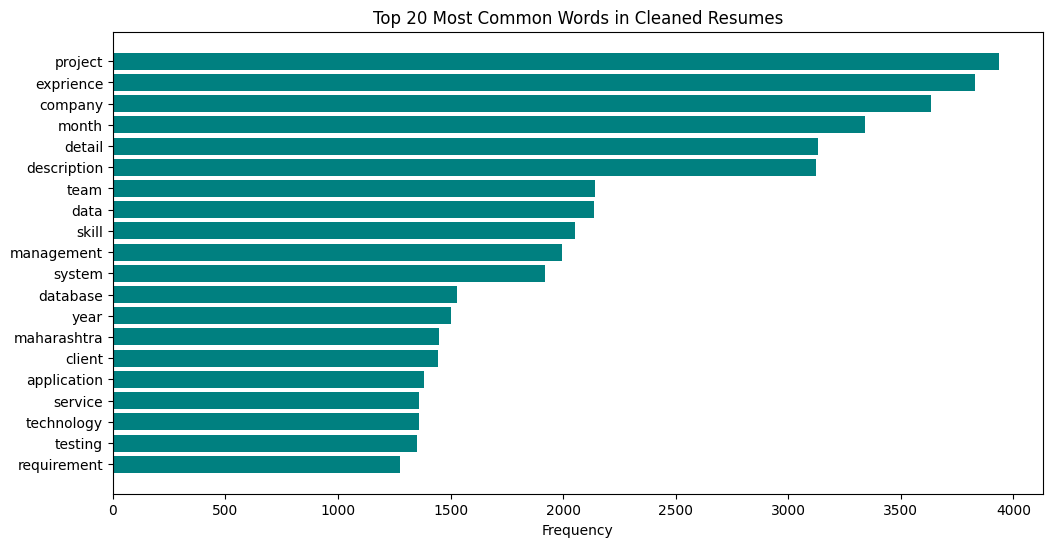

In [28]:
from collections import Counter
import matplotlib.pyplot as plt

# Assuming 'cleaned_resume' is the column with cleaned text
all_words_cleaned = " ".join(data['cleaned_text']).split()
word_freq_cleaned = Counter(all_words_cleaned)
common_words_cleaned = word_freq_cleaned.most_common(20)

# Plotting
words, counts = zip(*common_words_cleaned)
plt.figure(figsize=(12, 6))
plt.barh(words, counts, color='teal')
plt.gca().invert_yaxis()
plt.title('Top 20 Most Common Words in Cleaned Resumes')
plt.xlabel('Frequency')
plt.show()

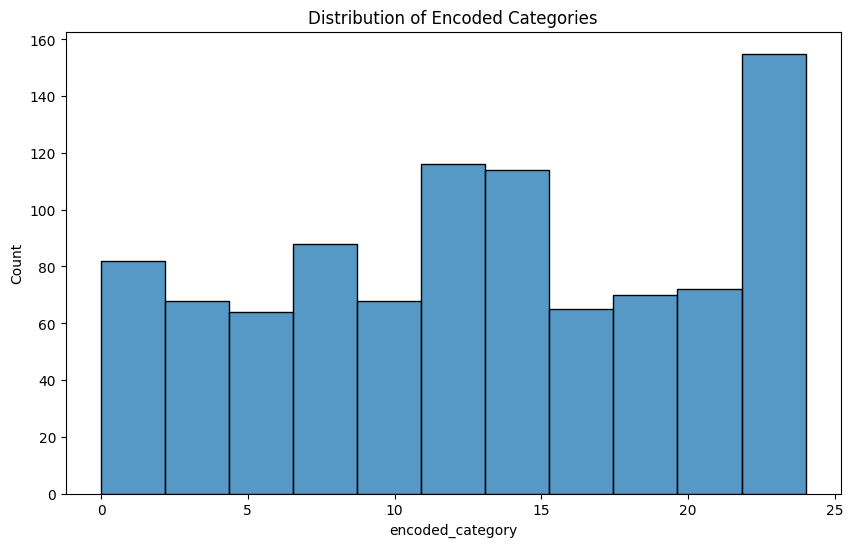

In [29]:
# Visualize the distribution of features
plt.figure(figsize=(10, 6))
sns.histplot(data['encoded_category'])
plt.title('Distribution of Encoded Categories')
plt.show()

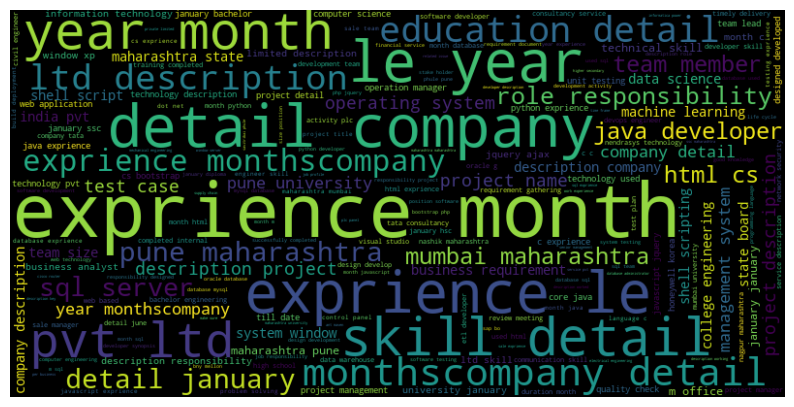

In [31]:
# Word cloud visualization
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400).generate(' '.join(data['cleaned_text']))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

MODEL BUILDING AND EVALUATION

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split data into training and validation sets
X = tfidf_features  # or bow_features
y = data['encoded_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# Function to train and evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

In [34]:
# Train and evaluate different models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    print(f"Evaluating {name}")
    evaluate_model(model, X_train, X_test, y_train, y_test)
    print("\\n")

Evaluating Logistic Regression
Accuracy: 0.9948186528497409
Precision: 0.9954663212435233
Recall: 0.9948186528497409
F1 Score: 0.9948954135482634
\n
Evaluating SVM
Accuracy: 0.9948186528497409
Precision: 0.9951424870466321
Recall: 0.9948186528497409
F1 Score: 0.9948062720919147
\n
Evaluating KNN
Accuracy: 0.9844559585492227
Precision: 0.9874064478986759
Recall: 0.9844559585492227
F1 Score: 0.9838850508539628
\n


MODEL INTERPRETABILITY

In [35]:
#hyperparameter tuning using GridSearchCV for SVM for 5 fold cross validation
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Best Parameters: {'C': 1, 'kernel': 'linear'}
Best Score: 0.9935064935064934


In [36]:
#hyperparameter tuning using GridSearchCV for Logistic regression for 5 fold cross validation
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings

# Suppress Convergence Warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Define the parameter grid with valid combinations
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 300]
}

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Initialize GridSearchCV with the Logistic Regression model and the parameter grid
grid_search = GridSearchCV(estimator=logistic_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='accuracy',
                           error_score='raise')  # Set error_score='raise' to debug errors

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Output the best parameters and the best score from cross-validation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Get the best estimator (model with the best parameters)
best_logistic_model = grid_search.best_estimator_



Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 10, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Cross-Validation Accuracy: 0.9974025974025974


In [64]:
#Prediction on the test set
y_pred = best_logistic_model.predict(X_test)

In [70]:
y_pred = pd.DataFrame(y_pred)
y_pred.columns = ['y_pred'] 

In [69]:
result = pd.concat([y_test, y_pred], axis=1)

print(result)

     encoded_category  y_pred
0                  15      15
1                  15      15
2                  15      15
3                  13      13
4                  14      14
..                ...     ...
188                20      20
189                 6       6
190                 6       6
191                 7       7
192                23      23

[193 rows x 2 columns]


In [37]:
# Evaluate the best model on the test set
print("Test Set Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

Test Set Performance:
Accuracy: 0.9948186528497409
Precision: 0.9958549222797927
Recall: 0.9948186528497409
F1 Score: 0.9950105545960468
